In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd

# 가상의 데이터 생성
# data라는 DataFrame에 키, 몸무게, 체지방률 데이터가 있다고 가정
# 각 행(row)이 한 사람을 나타내도록 구성되어 있어야 함
data = pd.DataFrame({
    'HT': np.random.normal(loc=170, scale=5, size=1000),
    'WT': np.random.normal(loc=70, scale=10, size=1000),
    'PBF': np.random.normal(loc=20, scale=2, size=1000)
})

# 모델 생성
with pm.Model() as model:
    # 각 변수의 평균과 표준편차를 맞추기 위한 사전 분포 정의
    mean = pm.Uniform('mean', lower=150, upper=200, shape=3)  # 3개의 변수(키, 몸무게, 체지방률)에 대한 평균
    std = pm.Uniform('std', lower=1, upper=10, shape=3)       # 3개의 변수(키, 몸무게, 체지방률)에 대한 표준편차
    cov_matrix = np.array([[1.0, 0.5, 0.2],
                       [0.5, 2.0, 0.3],
                       [0.2, 0.3, 3.0]])

    # Multivariate Normal likelihood 모델 정의
    obs = pm.MvNormal('obs', mu=mean, cov=cov_matrix, observed=data)

    # MCMC 샘플링
    trace = pm.sample(1000, tune=1000)


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std, mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


In [9]:
data

,HT,WT,PBF
0,163.964087,65.534092,21.065097
1,171.381377,77.129420,19.285059
2,159.276637,72.437312,20.109684
3,171.017987,57.055418,19.635997
4,170.422409,67.807081,18.887800
...,...,...,...
995,176.875577,76.865014,21.888864
996,171.731529,55.941505,20.913033
997,172.561950,61.413807,19.840877
998,167.289579,80.387490,20.126454


In [10]:
# (키, 몸무게, 체지방률)의 쌍으로 이루어진 데이터
data_pairs = data[['HT', 'WT', 'PBF']].values

# 공분산 행렬 계산
cov_matrix = np.cov(data_pairs, rowvar=False)

In [13]:
import pymc3 as pm
import numpy as np
import pandas as pd

# 데이터 생성 (생략)
data = pd.DataFrame({
    'HT': np.random.normal(loc=170, scale=5, size=1000),
    'WT': np.random.normal(loc=70, scale=10, size=1000),
    'PBF': np.random.normal(loc=20, scale=2, size=1000)
})

# 공분산 행렬 계산
data_pairs = data[['HT', 'WT', 'PBF']].values
cov_matrix = np.cov(data_pairs, rowvar=False)

# 평균을 설정

# 모델 생성
with pm.Model() as model:
    # 각 변수의 평균과 표준편차를 맞추기 위한 사전 분포 정의
    ht_mean = pm.Uniform('ht_mean', lower=150, upper=200)  # 키의 평균
    wt_mean = pm.Uniform('wt_mean', lower=50, upper=100)   # 몸무게의 평균
    pbf_mean = pm.Uniform('pbf_mean', lower=10, upper=30)  # 체지방률의 평균

    # (키, 몸무게, 체지방률)의 쌍을 다변량 정규 분포로 관측
    observed_data = data[['HT', 'WT', 'PBF']].values
    obs = pm.MvNormal('obs', mu=[ht_mean, wt_mean, pbf_mean], cov=cov_matrix, observed=observed_data)

# MCMC 샘플링
with model:
    trace = pm.sample(1000, tune=1000)


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pbf_mean, wt_mean, ht_mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


/opt/anaconda3/envs/MCMC/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


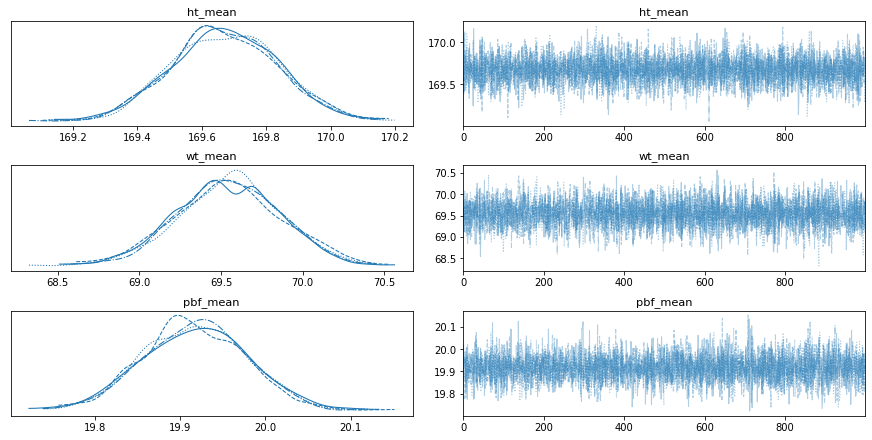

In [22]:
pm.traceplot(trace)
plt.show()